# Optimization 101: first steps in mathematical optimization with Python

## Mathieu Besançon

<img src="sisyphus.jpg" alt="Sisyphus" style="width: 200px;"/> 
 
Sisyphus, the first reported case of [endless optimization loop](https://en.wikipedia.org/wiki/Sisyphus). [1] 

Optimization is a field of applied mathematics which objective is to find the minimum (respectively maxiumum) to a function under a set of constraints. The function of interest is called **objective function**. Some elements of terminology can be found on [Wikipedia](en.wikipedia.org/wiki/Mathematical_optimization).

## Optimization in Machine Learning

Optimization is at the core of the model building process. Machine Learning models are based on mathematical, probabilistic and geometrical considerations, the key step when deploying those models consists in finding the optimal **configuration** and **parameters** of the model.

For example in a feed-forward neural network, the configuration is determined by the number of hidden layers and by the number of neurons on each of them. The parameters are the weights associated with each pair of neurons connected. In the well-known k-nearest neighbors model, a configuration choice would be the distance function to use and the parameter is the number of neighbors **k** used to evaluate an observation.

Other example of fitting parameters for polynomial regression:
<img src="poly_reg.png" alt="Fitting model parameters on a polynomial regression" style="width: 400px;"/> 

## Getting set up: useful libraries and objective function

Numpy only will be used for computation, and matplotlib tools will help us visualize functions and algorithms.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

The objective function is the one we are trying to minimize. To make things interesting, we will test ourselves with the [Rastrigin function](https://en.wikipedia.org/wiki/Rastrigin_function) which is often used as a test in optimization because of its particular and tricky shape. It is defined for any number of dimensions $d\geq 2$ and can be seen as a sum of individual functions on each dimension.

$R(x) = A\cdot d + \sum_{i=1}^{d} (x_i)^2 - A\cdot cos(2\pi x_i) $

With $A = 10$ and d being the number of dimensions of the space.

In [2]:
def rastrigin(x):
    """
    defines the n-dimensional Rastrigin function
    """
    A = 10
    return A*len(x)+(np.power(x,2)-A*np.cos(2*np.pi*x)).sum()

Several optimization routines use the [gradient](https://en.wikipedia.org/wiki/Gradient) to get the best descent direction.  
  
Several intuitive explanations can be found on Quora:  
https://www.quora.com/What-is-a-gradient  
https://www.quora.com/What-is-the-significance-of-gradient-vectors  
https://www.quora.com/What-is-a-gradient-in-mathematics  

In our case, the gradient is easy to compute:  
$\nabla R(x) = 2x + 2\pi A sin(2\pi x)$

In [3]:
def rastrin_grad(x):
    """
    returns the exact gradient of the rastringin function
    """
    A = 10
    return 2*x+2*A*np.pi*np.sin(2*np.pi*x)

We can visualize the shape of the function using a contour plot and a 3d surface plot.

In [4]:
# Visualization of the objective function

xmesh, ymesh = np.meshgrid(np.arange(-5,5,.1),\
    np.arange(-5,5,.1))

pmap = np.array([xmesh.ravel(),ymesh.ravel()]).T
p = np.array([])
for line in pmap:
    p = np.append(p,(rastrigin(line)))
    
p = p.reshape(xmesh.shape)


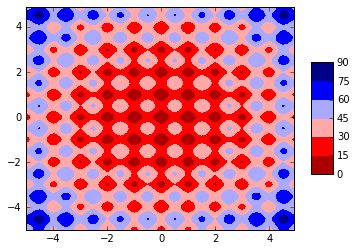

In [5]:
f1 = plt.figure()
ax1 = f1.gca()
cp = ax1.contourf(xmesh, ymesh, p, cmap= matplotlib.cm.seismic_r,alpha=1)
plt.colorbar(cp,shrink=.5,aspect=5)
plt.show()

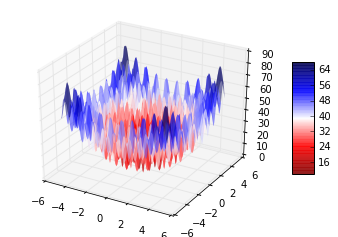

In [6]:
fig = plt.figure()
ax = fig.gca(projection='3d')
s = ax.plot_surface(xmesh, ymesh, p, rstride=4, cstride=4, cmap = matplotlib.cm.seismic_r,\
    linewidth=0,alpha=.5)
fig.colorbar(s, shrink=0.5, aspect=5)
plt.show()

You can notice that the function is a combination of a polynomial of degree 2 and of a sinusoid. It has one global minimum at $x = (0,0)$ and numerous local optima every 0.5 step.

In [7]:
rastrigin(np.array([0,0]))

0.0

In [8]:
rastrin_grad(np.array([0,0]))

array([ 0.,  0.])

## Fixed step gradient descent

This is the first basic algorithm in continuous optimization. The information provided by the gradient is the **steepest ascent** direction, so the opposite direction will be the steepest descent at any given point. The algorithm moves from point to point while always following this steepest descent until some convergence condition is met.  
$x_{n+1} = x_{n} + \alpha_n \nabla R(x_{n})$  
$\alpha_n$ is the step size at a given iteration. In our case, alpha remains constant during the whole optimization. The point of the reseach phase is to find an optimal step size, generating accurate results (minimum found) but also an acceptable number or iterations.

In [9]:
def fixed_step(x0,alpha):
    """
    iterates the fixed step gradient descent
    from a starting point and with a step size
    returns the number of iterations, 
    the final value of the function and of the gradient,
    """
    x1 = x0+1
    niter = 0
    while niter<5000 and np.sum(np.abs(rastrigin(x0)-rastrigin(x1)))>10**(-5):
        x1 = x0        
        x0 = x0 - alpha*rastrin_grad(x0)
        niter+=1
    return niter,x0,rastrigin(x0),rastrin_grad(x0)

In [10]:
fvalue = []
niter = []
alpha = []
xn = []
gradvalue = []
for al in np.arange(0.00005,0.005,0.00001):
    for x in np.random.randn(100,2)*5:
        alpha.append(al)
        a, b, c, d = fixed_step(x,al)
        fvalue.append(c)
        niter.append(a)
        xn.append(np.power(x,2).sum())
        gradvalue.append(d)

Starting from random points around 0, we run the optimization routine hundred times for several step values, trying to find the best result according to the final value of the objective and of the gradient, given a maximal number of iterations.

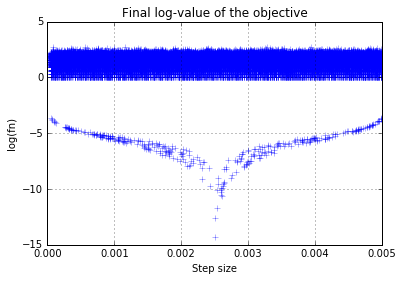

In [11]:
plt.plot(alpha,np.log10(np.array(fvalue)+10**(-15)),'+',alpha=.6)
plt.grid()
plt.xlabel("Step size")
plt.ylabel("log(fn)")
plt.title("Final log-value of the objective")
plt.show()

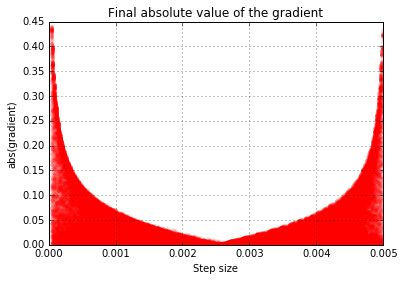

In [12]:
plt.plot(alpha,np.abs(np.array(gradvalue)),'r.',alpha=.1)
plt.grid()
plt.xlabel("Step size")
plt.ylabel("abs(gradient)")
plt.title("Final absolute value of the gradient")
plt.show()

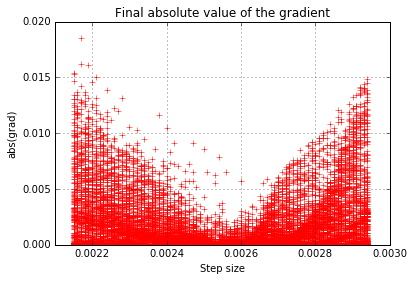

In [13]:
plt.plot(alpha[21000:29000],np.abs(np.array(gradvalue[21000:29000])),'r+')
plt.grid()
plt.xlabel("Step size")
plt.ylabel("abs(grad)")
plt.title("Final absolute value of the gradient")
plt.show()

Now that a step size has been found, we can visualize the path taken by the algorithm before converging to a final value.

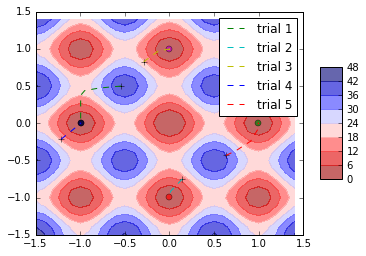

In [14]:
xmesh2, ymesh2 = np.meshgrid(np.arange(-1.5,1.5,.1),\
    np.arange(-1.5,1.5,.1))

pmap = np.array([xmesh2.ravel(),ymesh2.ravel()]).T
p = np.array([])

for line in pmap:
    p = np.append(p,(rastrigin(line)))
    
p = p.reshape(xmesh2.shape)

np.random.seed(123)
f2 = plt.figure()
ax2 = f2.gca()
cp2 = ax2.contourf(xmesh2, ymesh2, p, cmap= matplotlib.cm.seismic_r,alpha=0.6)
plt.colorbar(cp2,shrink=.5,aspect=5)
alpha = 0.0026
for trial in range(5):
    x0 = np.random.randn(1,2)*0.5
    niter = 0
    path = []
    while niter < 1000 and np.sum(np.abs(rastrin_grad(x0)))>10**(-7):
        path.append(x0)
        x0 = x0 - alpha*rastrin_grad(x0)
        niter+=1
    path = np.array(path).reshape(len(path),2)
    plt.plot(path[0,0],path[0,1],'k+')
    plt.plot(path[-1,0],path[-1,1],'o',alpha=.7)
    plt.plot(path[:,0],path[:,1],'--',label="trial "+str(trial+1))
    plt.legend()
    plt.xlim(-1.5,1.5)
    plt.ylim(-1.5,1.5)
    
plt.show()

In [15]:
niter

9

### Results

As we notice, the update is always done in the steepest descent, which is not the fastest way of reaching the minimum. Furthermore, the algorithm is "short-sighted" and will always rush to the closest minimum. On the previous example, none of the 5 random starts yielded a final point at (0,0).

### Other alpha values

To prove the point of carefully choosing alpha, we will show the effect of a too big step value.

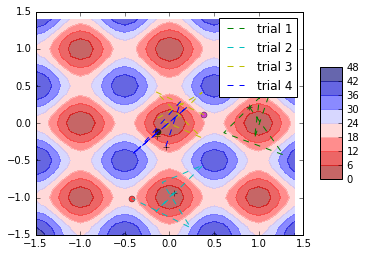

In [16]:
np.random.seed(3)
f3 = plt.figure()
ax3 = f3.gca()
cp3 = ax3.contourf(xmesh2, ymesh2, p, cmap= matplotlib.cm.seismic_r,alpha=0.6)
plt.colorbar(cp3,shrink=.5,aspect=5)
for trial in range(4):
    x0 = np.random.randn(1,2)*0.5
    niter = 0
    path = []
    while niter < 6 and np.sum(np.abs(rastrin_grad(x0)))>10**(-7):
        path.append(x0)
        x0 = x0 - (4*alpha)*rastrin_grad(x0)
        niter+=1
    path = np.array(path).reshape(len(path),2)
    plt.plot(path[0,0],path[0,1],'k+')
    plt.plot(path[-1,0],path[-1,1],'o',alpha=.7)
    plt.plot(path[:,0],path[:,1],'--',label="trial "+str(trial+1))
    plt.legend()
    plt.xlim(-1.5,1.5)
    plt.ylim(-1.5,1.5)
    
plt.show()

The algorithm does not stabilize and always overshoot the minimum it is aiming for, it will not converge and will keep oscillating around the objective.  
  
Now what happens with a too low $\alpha$?

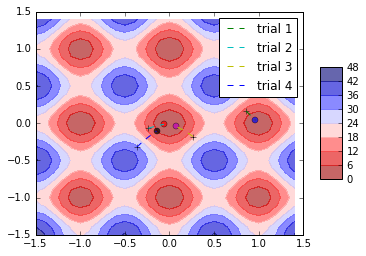

In [17]:
np.random.seed(333)
f4 = plt.figure()
ax4 = f4.gca()
cp4 = ax4.contourf(xmesh2, ymesh2, p, cmap= matplotlib.cm.seismic_r,alpha=0.6)
plt.colorbar(cp4,shrink=.5,aspect=5)
for trial in range(4):
    x0 = np.random.randn(1,2)*0.5
    niter = 0
    path = []
    while niter < 30 and np.sum(np.abs(rastrin_grad(x0)))>10**(-7):
        path.append(x0)
        x0 = x0 - (.05*alpha)*rastrin_grad(x0)
        niter+=1
    path = np.array(path).reshape(len(path),2)
    plt.plot(path[0,0],path[0,1],'k+')
    plt.plot(path[-1,0],path[-1,1],'o',alpha=.7)
    plt.plot(path[:,0],path[:,1],'--',label="trial "+str(trial+1))
    plt.legend()
    plt.xlim(-1.5,1.5)
    plt.ylim(-1.5,1.5)
    
plt.show()

In [18]:
niter

30

As wee see, the maximal number of iterations is reached before the points converged torwards their respective local minimum. The number of iterations is greater than required, which can be problematic for problems in higher dimensions, or when the evaluation of the function or of its gradient is costly. However, if a given step $\alpha$ works; it can be stated that a smaller step will also eventually converge.

## Approaching global optimization: simulated annealing
A problem we noticed with 
Simulated annealing is an algorithm aiming at getting passed the local minima by allowing downhill but also uphill movements. The probability of accepting an uphill variation depends on how much this variation worsens the objective function, and on "temperature" which represents a degree of agitation. Higher agitation levels produce more accepted ascending movements. The trick of the algorithm is to progressively reduce the temperature, stabilizing the algorithm torward a minimum after several iterations.

More can be found on [Quora](https://www.quora.com/topic/Simulated-Annealing) and on [Wikipedia](https://en.wikipedia.org/wiki/Simulated_annealing). The key required elements are:

### Required functions
* A **candidate distribution** from which new possible points can be randomly selected.
* An **acceptance function** returning the probability of accepting a candidate point.
* A **cooling schedule** determining how fast the algorithm will be forced to converge torwards a minimum. If the cooling is too fast, the algorithm will immediately converge on a local minimum. If it is too slow, the algorithm will take too much time and iterations to come to a stable acceptable solution.

We will use an exponential cooling schedule and the [Bennet acceptance ratio](https://en.wikipedia.org/wiki/Bennett_acceptance_ratio), which implementations are given below.

In [19]:
def temperature(n, t0=20, cooling_rate=.4):
    """
    coefficient determining the probability of acceptance
    for a move highering the objective function
    """
    return t0*cooling_rate**n
    
def acceptance(x0,x1,t):
    """
    returns the probability of accepting
    a move, given the initial, final values
    and the current temperature
    """
    return min(1,np.exp(-(rastrigin(x1)-rastrigin(x0))/t))
    
def candidate(x0,n,slowing_rate=.5):
    """
    takes a starting point and generates
    a new candidate from the specific distribution
    """
    theta = np.random.rand(1)[0]*2*np.pi
    rad = np.random.rand(1)[0]*3*(slowing_rate)**n
    return np.array([rad*np.cos(theta),
                     rad*np.sin(theta)])

The iterating function can now be defined: a candidate point is taken and accepted if its acceptance probability is greater than a standard uniform random number.

In [20]:
def sa_iterate(t0,cooling_rate,slowing_rate,n,x0):
    """
    Given all simulation parameters and initial
    position, returns a final position
    """
    x1 = candidate(x0,n,slowing_rate)
    if acceptance(x0,x1,temperature(n,t0,cooling_rate))>np.random.rand():
        return x1
    else:
        return x0

Eventually, a global function iterates several time, reducing the temperature and moving in the space until the convergence condition is met or the maximal number of iterations is reached.

In [21]:
def sa_global(t0,cooling_rate,slowing_rate,x0=np.random.rand(2,)):
    """
    iterates until convergence or too many iterations
    returns the path taken during the exploration
    and number of iterations
    """
    x1 = x0
    niter = 0
    path = []
    converge = False
    while niter < 5000 and converge == False:
        path.append(x0)
        if len(path)>=5:
            merror = 0
            for i in range(-5,-1):
                merror+=sum((path[i]-path[i+1])**2)
            converge = (merror < 10**(-9))
        if not converge:
            x1 = x0
            while (x1==x0).sum()/x0.size == 1:
                x1 = sa_iterate(t0,cooling_rate,slowing_rate,niter,x0)
            niter+=1
            x0 = x1
    return path, niter

In [22]:
np.random.seed(333)
path, niter = sa_global(10,.4,.6,(np.random.rand(2,)*6)-3)
path = np.array(path)

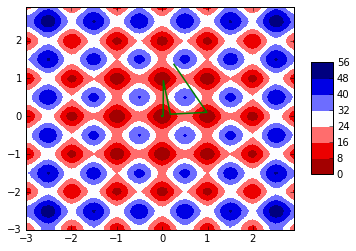

In [23]:
# Algorithm exploration visualization
xmesh, ymesh = np.meshgrid(np.arange(-3,3,.1),\
    np.arange(-3,3,.1))

pmap = np.array([xmesh.ravel(),ymesh.ravel()]).T
p = np.array([])
for line in pmap:
    p = np.append(p,(rastrigin(line)))
    
p = p.reshape(xmesh.shape)

f1 = plt.figure()
ax1 = f1.gca()
cp = ax1.contourf(xmesh, ymesh, p, cmap= matplotlib.cm.seismic_r,alpha=1)
plt.colorbar(cp,shrink=.5,aspect=5)
plt.plot(path[:,0],path[:,1],'g',LineWidth=1.5)
plt.show()


In [24]:
niter

25

The algorithm used very little computational capacity and few iterations. Furthermore, we can prove it will always converge torwards the global minimum with acceptable parameters.  

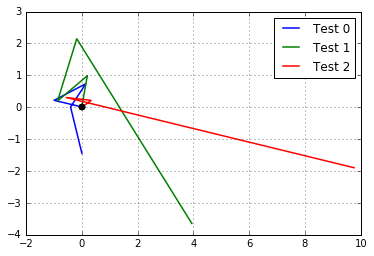

In [25]:
np.random.seed(9)
for trial in range(3):
    path, niter = sa_global(10,.4,.6,np.random.randn(2,)*5)
    path = np.array(path)
    plt.plot(path[:,0],path[:,1],LineWidth=1.5,label="Test "+str(trial))
    plt.plot(path[-1,0],path[-1,1],'ok')
plt.grid()
plt.legend()
plt.show()

**However**, we can notice a small drawback, the exploration converges to the region of the global optimum rather rapidly, but it takes quite some time before stabilizing on an acceptable point, there are lots of micro-oscillations around (0,0), unlike gradient descent which convergence was roughly equally fast at every step. A nice solution would be to start with simulated annealing to avoid the trap of local optima, and after we measure the algorithm is turning around the same point, switching to a locally efficient algorithm such as gradient descent or even better, [Newton's method](https://en.wikipedia.org/wiki/Newton's_method_in_optimization) or related techniques.

## Final words

This concludes this quick pythonic overview of the fascinating field of optimization, in which we did not even scratch the surface. Although, we covered two widely used families of optimization techniques: gradient descent and stochastic optimization, both used on various applications.

Want to know more?  
If you want to explore other categories, I would encourage you to take a look at [line search methods](https://en.wikipedia.org/wiki/Line_search) which try to find an optimal step size at every iteration for gradient descent and [Quasi-Newton methods](https://en.wikipedia.org/wiki/Quasi-Newton_method) which uses a different descent direction, based on the Hessian matrix (or second derivative). 

### About me

I am a graduate student from the University of Technology of Compiègne, majoring in Process and Industrial Engineering with strong interest in quantitative approaches and a minor in Mathematical Modeling.

Have any remarks, questions or anything else?  
Get in touch at mathieu(dot)besancon(at)gmail.com, visit my [Strikingly page](mathieu-besancon.strikingly.com), my (messy) [Github](github.com/mbesancon), [Quora](https://www.quora.com/profile/Mathieu-Besan%C3%A7on), [Linkedin](https://fr.linkedin.com/in/mbesancon/en) or [Twitter](https://twitter.com/MathieuBesancon).

[1] Image source: https://www.flickr.com/photos/1000photosofnewyorkcity/7150456391